In [1]:
# !pip uninstall -y py-openaq

In [2]:
# pip list

In [3]:
# pip install openaq

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
# from openaq import OpenAQ
# import pandas as pd

# client = OpenAQ(api_key='b878aacfcb4340bad05b580bfc2bbe021ea88c3ad7556af3947a139a75c1e018')
# response = client.measurements.list(locations_id=289, date_from="2020-01-01", date_to="2021-01-01")
# data_dict = response.dict()
# df = pd.json_normalize(data_dict['results'])
# df.info()

In [7]:
# import requests

# url = "https://api.openaq.org/v2/measurements?date_from=2017-01-01&date_to=2023-01-01&limit=10001&page=1&offset=0&sort=desc&radius=1000&location_id=289&order_by=datetime"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)#789

# print(response.text)

In [8]:
# df1 = pd.json_normalize(response.json()['results'])

In [9]:
# import requests

# url = "https://api.openaq.org/v2/measurements?date_from=2023-01-02&date_to=2024-06-03&limit=10001&page=1&offset=0&sort=desc&radius=1000&location_id=289&order_by=datetime"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)#789

# print(response.text)

In [10]:
# df2 = pd.json_normalize(response.json()['results'])

In [11]:
# aq = pd.concat([df1, df2])

In [12]:
# aq = aq.reset_index()

In [13]:
# aq = aq[aq['parameter']=='pm25']

In [14]:
# aq.info()

In [15]:
# aq.to_csv(f'data/openaqpm2.5')

In [4]:
aq = pd.read_csv('data/openaqpm2.5')

In [17]:
aq.head()

,Unnamed: 0,index,locationId,location,parameter,value,unit,country,city,isMobile,isAnalysis,entity,sensorType,date.utc,date.local,coordinates.latitude,coordinates.longitude
0,0,0,289,LOCKELAND,pm25,9.4,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T18:00:00+00:00,2022-12-05T12:00:00-06:00,36.1767,-86.7386
1,1,1,289,LOCKELAND,pm25,9.7,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T17:00:00+00:00,2022-12-05T11:00:00-06:00,36.1767,-86.7386
2,2,2,289,LOCKELAND,pm25,10.0,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T16:00:00+00:00,2022-12-05T10:00:00-06:00,36.1767,-86.7386
3,3,3,289,LOCKELAND,pm25,11.0,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T15:00:00+00:00,2022-12-05T09:00:00-06:00,36.1767,-86.7386
4,4,4,289,LOCKELAND,pm25,10.8,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T14:00:00+00:00,2022-12-05T08:00:00-06:00,36.1767,-86.7386


In [8]:
# aq['date.local'] = pd.to_datetime(aq['date.local'])#, utc=True)

aq['date'] = pd.to_datetime(aq['date.local'],utc=True).dt.tz_convert("America/New_York").dt.tz_localize(None)

aq['hour'] = aq['date'].dt.hour

aq['date'] = aq['date'].dt.date

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='Count'>

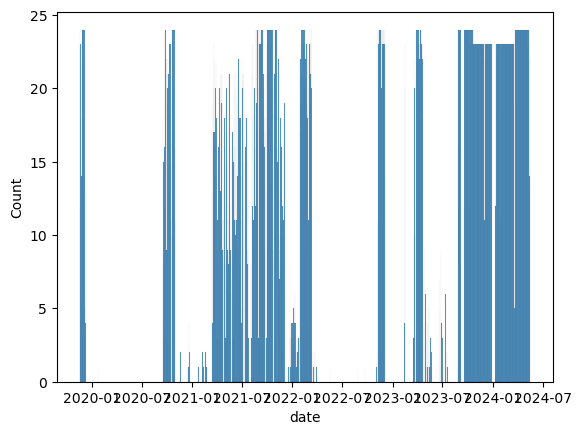

In [9]:
sns.histplot(data=aq, x="date")

In [150]:
aq = aq[['date','hour','value']]
aq['date']=pd.to_datetime(aq['date'])

In [144]:
average_concentration = aq.groupby(['date','hour'])['value'].agg(['sum', 'min', 'max', 'mean','median']).round(2).reset_index()

# average_concentration = average_concentration.rename(columns={'value': 'pm2.5[ ]', 'Hour': 'hour'})

average_concentration['date']=pd.to_datetime(average_concentration['date'])

# average_concentration.loc[(average_concentration['date'] > '2022-06-01')
#                      & (average_concentration['date'] < '2022-07-01')]
average_concentration.head(20)

,date,hour,sum,min,max,mean,median
0,2019-11-18,12,6.3,6.3,6.3,6.3,6.3
1,2019-11-18,13,4.8,4.8,4.8,4.8,4.8
2,2019-11-18,14,6.3,6.3,6.3,6.3,6.3
3,2019-11-18,15,5.3,5.3,5.3,5.3,5.3
4,2019-11-18,16,6.1,6.1,6.1,6.1,6.1
5,2019-11-18,17,6.8,6.8,6.8,6.8,6.8
6,2019-11-18,18,7.1,7.1,7.1,7.1,7.1
7,2019-11-18,19,11.4,11.4,11.4,11.4,11.4
8,2019-11-18,20,12.2,12.2,12.2,12.2,12.2
9,2019-11-18,21,12.1,12.1,12.1,12.1,12.1


In [109]:
high_pollution = average_concentration[average_concentration['sum']>400]

In [110]:
high_pollution_days = high_pollution['date'].value_counts()
high_pollution_days = high_pollution_days.reset_index()
high_pollution_days

,date,count
0,2020-10-08,1
1,2020-10-09,1
2,2023-12-22,1
3,2023-09-07,1
4,2023-04-13,1
5,2023-03-22,1
6,2022-11-25,1
7,2022-11-24,1
8,2022-03-05,1
9,2022-02-16,1


In [100]:
new = high_pollution_days.merge(average_concentration, how='left', on=['date'])
new

,date,count,sum,min,max,mean
0,2020-10-08,1,558.9,14.6,53.4,27.94
1,2020-10-09,1,733.1,15.4,58.9,34.91
2,2023-12-22,1,428.1,8.9,49.3,18.61
3,2023-09-07,1,491.7,5.8,30.5,20.49
4,2023-04-13,1,401.4,5.8,34.8,16.72
5,2023-03-22,1,454.3,17.7,30.4,22.72
6,2022-11-25,1,432.8,7.2,32.7,18.82
7,2022-11-24,1,574.9,8.8,46.1,23.95
8,2022-03-05,1,478.7,8.7,46.7,22.80
9,2022-02-16,1,508.4,7.6,43.8,22.10


In [13]:
# PM25 = pd.read_csv('data/Air_Quality_and_Pollen_Count.csv')

In [14]:
PM25.head()

,Date,Air Quality Index,Responsible Pollutant,Pollen Count,Pollen Type
0,06/05/2024,47.0,PM2.5,0.0,Grass
1,06/04/2024,47.0,PM2.5,1.0,Grass
2,06/03/2024,50.0,PM2.5,6.0,Grass
3,06/02/2024,49.0,PM2.5,5.0,Grass
4,06/01/2024,51.0,PM2.5,0.0,Grass


In [24]:
# PM25 = PM25[PM25['Responsible Pollutant']=='PM2.5'].reset_index()

In [15]:
PM25['Date'] = pd.to_datetime(PM25['Date'], format = 'mixed')

In [16]:
pm25 = PM25[PM25['Date']>='01/01/2017'].reset_index()

In [27]:
# # https://data.nashville.gov/dataset/Air-Quality-and-Pollen-Count/h7nh-qj2m/data
# pm25

In [28]:
# pm25.to_csv(f'data/nashville.gov_pm2.5')

In [30]:
# pm25 = pd.read_csv('data/nashville.gov_pm2.5')

In [17]:
pm25.to_excel(f'data/aqi.xlsx', index = False)

In [31]:
pm25.head()

,Unnamed: 0,level_0,index,Date,Air Quality Index,Responsible Pollutant,Pollen Count,Pollen Type
0,0,0,0,2024-06-05,47.0,PM2.5,0.0,Grass
1,1,1,1,2024-06-04,47.0,PM2.5,1.0,Grass
2,2,2,2,2024-06-03,50.0,PM2.5,6.0,Grass
3,3,3,3,2024-06-02,49.0,PM2.5,5.0,Grass
4,4,4,4,2024-06-01,51.0,PM2.5,0.0,Grass


In [32]:
date_aqi = pm25.groupby(['Date'])['Air Quality Index'].mean().reset_index()
date_aqi = date_aqi.set_axis(['date','aqi'], axis='columns')
date_aqi['date'] = pd.to_datetime(date_aqi['date']).dt.date
date_aqi

,date,aqi
0,2017-01-01,29.0
1,2017-01-02,27.0
2,2017-01-03,18.0
3,2017-01-04,19.0
4,2017-01-05,19.0
...,...,...
1744,2024-06-01,51.0
1745,2024-06-02,49.0
1746,2024-06-03,50.0
1747,2024-06-04,47.0


C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='Count'>

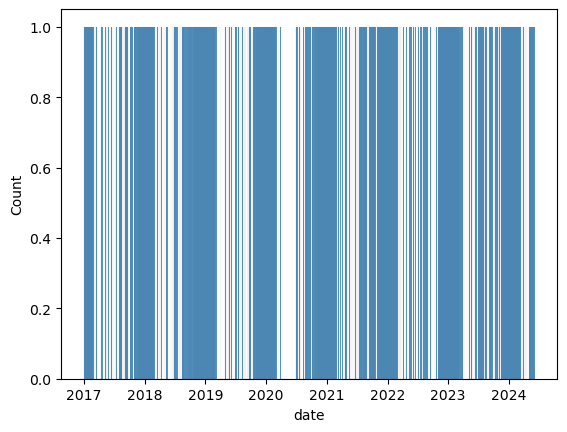

In [14]:
sns.histplot(data=date_aqi, x="date")

In [32]:
# pd.set_option('display.max_rows', None)
# pm25['Date'].value_counts().reset_index().sort_values(by='Date')

In [5]:
traffic = pd.read_csv('data/Traffic_Accidents_20240605.csv', low_memory=False)

In [6]:
traffic = traffic.rename(columns={'Date and Time': 'date', 'Hour': 'hour'})

In [7]:
traffic['date'] = pd.to_datetime(traffic['date']).dt.date

In [8]:
traffic = traffic[0:184623]

In [9]:
traffic['Month'].value_counts()

Month
May          16671
March        16586
October      16552
January      16412
April        16101
February     15916
November     15162
August       15112
December     14247
June         14174
September    13946
July         13744
Name: count, dtype: int64

In [10]:
traffic.to_excel(f'data/traffic.xlsx', index = False)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='Count'>

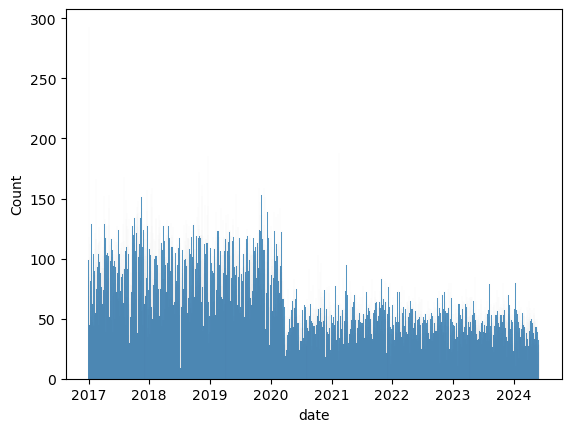

In [20]:
sns.histplot(data=traffic, x="date")

In [153]:
# traffic[traffic['date'] == timestamp('2017-01-01')]
traffic['date'] = pd.to_datetime(traffic['date'])
traffic.head()


# traffic[accidents per date]

,Accident Number,date,Year,Month,hour,Weekday,Number of Motor Vehicles,Single or Multiple,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,NaN,True,212336.0,9.0,UNKNOWN,2.0,RAIN,2.0,DARK - NOT LIGHTED,99,UNKNOWN MOST HARMFUL EVENT,MARSDEN AV & STRATFORD AV,NASHVILLE,TN,37216.0,1407.0,EAST,36.2004,-86.7170,POINT (-86.717 36.2004)
1,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,2.0,multiple,0.0,0.0,NaN,True,109536.0,4.0,ANGLE,2.0,RAIN,3.0,DARK - LIGHTED,14,PARKED MOTOR VEHICLE,SKYLINE MEMORIAL CT & I65 S EXT RAMP,MADISON,TN,37115.0,2009.0,MADISO,36.2454,-86.7512,POINT (-86.7512 36.2454)
2,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,2.0,multiple,1.0,0.0,NaN,False,206675.0,4.0,ANGLE,2.0,RAIN,2.0,DARK - NOT LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,10TH AVS & HALCYON AV,NASHVILLE,TN,37204.0,6927.0,MIDTOW,36.1224,-86.7865,POINT (-86.7865 36.1224)
3,2.017001e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,True,True,226092.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,99.0,UNKNOWN,9.0,UNKNOWN,38,FENCE,12TH AVN & COCKRILL ST,NASHVILLE,TN,37208.0,4473.0,NORTH,36.1765,-86.8032,POINT (-86.8032 36.1765)
4,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,True,True,224529.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,2.0,RAIN,9.0,UNKNOWN,30,UTILITY POLE,I24 W EXT RAMP & I 24,NASHVILLE,TN,37211.0,8829.0,SOUTH,36.1074,-86.7197,POINT (-86.7197 36.1074)


In [136]:
# avg_injury_by_date = traffic.groupby(['date', 'hour'])['Number of Injuries'].mean().reset_index()
# avg_injury_by_date

In [137]:
# accident_count = traffic['date'].value_counts().reset_index().sort_values(by='date').reset_index()
# # accident_count = accident_count.drop(accident_count[1].index)
# accident_count.drop(accident_count.columns[0],axis=1,inplace=True)
# accident_count = accident_count.set_axis(['date','count'], axis='columns')
# accident_count['avg_injury'] = avg_injury_by_date['Number of Injuries']
# accident_count

# ,'avg_ingury_per_accident'

In [29]:
accidents_v_concentration = traffic.merge(date_aqi, how='left', on=['date'])
accidents_v_concentration = accidents_v_concentration[accidents_v_concentration['aqi'].notna()]
# accidents_v_concentration['Number of Injuries 2'] = accidents_v_concentration['Number of Injuries'].shift(-1)


accidents_v_concentration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119297 entries, 0 to 184622
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             119297 non-null  float64
 1   date                        119297 non-null  object 
 2   Year                        119297 non-null  float64
 3   Month                       119297 non-null  object 
 4   hour                        119297 non-null  float64
 5   Weekday                     119297 non-null  object 
 6   Number of Motor Vehicles    119296 non-null  float64
 7   Single or Multiple          119297 non-null  object 
 8   Number of Injuries          119297 non-null  float64
 9   Number of Fatalities        119297 non-null  float64
 10  Property Damage             9013 non-null    object 
 11  Hit and Run                 119289 non-null  object 
 12  Reporting Officer           119291 non-null  float64
 13  Collision Type Code

In [42]:
accidents_v_concentration2 = traffic.merge(new, how='left', on=['date', 'hour'])
accidents_v_concentration2 = accidents_v_concentration2[accidents_v_concentration2['pm2.5[ ]'].notna()]
accidents_v_concentration2['Following Day Injuries'] = accidents_v_concentration2['Number of Injuries'].shift(-1)

In [123]:
x = accidents_v_concentration['date'].value_counts().reset_index()
x = x.set_axis(['date','number of accidents'], axis='columns')
x

,date,number of accidents
0,2019-11-22,159
1,2019-11-26,151
2,2019-11-20,128
3,2020-01-24,123
4,2019-11-21,112
...,...,...
759,2024-02-04,17
760,2024-03-29,16
761,2022-11-24,16
762,2021-12-25,12


In [126]:
accidents_v_concentration = accidents_v_concentration.merge(x, how='left', on=['date'])

In [127]:
accidents_v_concentration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38757 entries, 0 to 38756
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accident Number             38757 non-null  float64       
 1   date                        38757 non-null  datetime64[ns]
 2   Year                        38757 non-null  float64       
 3   Month                       38757 non-null  object        
 4   hour                        38757 non-null  float64       
 5   Weekday                     38757 non-null  object        
 6   Number of Motor Vehicles    38757 non-null  float64       
 7   Single or Multiple          38757 non-null  object        
 8   Number of Injuries          38757 non-null  float64       
 9   Number of Fatalities        38757 non-null  float64       
 10  Property Damage             3126 non-null   object        
 11  Hit and Run                 38752 non-null  object    

In [22]:
accidents_v_concentration.to_excel(f'data/test6.xlsx', index = False)

In [45]:
a = accidents_v_concentration[['date', 'Number of Injuries', 'pm2.5[ ]']].sort_values(by='date')

In [46]:
b = a.groupby('date').agg({'Number of Injuries':'sum', 'pm2.5[ ]':'mean'}).reset_index()

In [47]:
b['Number of Injuries 2'] = b['Number of Injuries'].shift(-1)

In [48]:
b

,date,Number of Injuries,pm2.5[ ],Number of Injuries 2
0,2019-11-18,14.0,7.364583,30.0
1,2019-11-19,30.0,9.674766,63.0
2,2019-11-20,63.0,6.271311,45.0
3,2019-11-21,45.0,10.975701,51.0
4,2019-11-22,51.0,9.983969,6.0
...,...,...,...,...
742,2024-05-13,24.0,7.364706,13.0
743,2024-05-14,13.0,7.460000,28.0
744,2024-05-15,28.0,4.990909,21.0
745,2024-05-16,21.0,6.858824,9.0


In [49]:
# b.to_excel(f'data/test.xlsx', index = False)

In [50]:
# accidents_v_concentration.to_csv(f'data/accidents_v_concentration.csv')

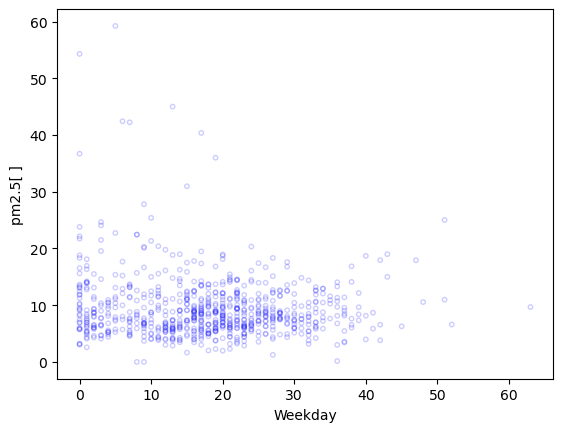

In [51]:
x = b['Number of Injuries 2']
y = b['pm2.5[ ]']

# warning = y>50

# plt.scatter(x[~warning], y[~warning], s=1, alpha=.5, label='unacceptable', facecolors='none', edgecolors='b')
plt.scatter(x, y, s=10, alpha=0.2, label='acceptable', facecolors='none', edgecolors='b')

plt.xlabel("Weekday")
plt.ylabel("pm2.5[ ]")

plt.show()

In [52]:
from scipy import stats
stats.pearsonr(b['Number of Injuries'], b['pm2.5[ ]'])

PearsonRResult(statistic=-0.11558010321523085, pvalue=0.0015546994098739548)

In [53]:
from scipy import stats
stats.pearsonr(b['Number of Injuries 2'], b['pm2.5[ ]'])

ValueError: array must not contain infs or NaNs

In [ ]:
sns.regplot(data=b, x="Number of Injuries 2", y="pm2.5[ ]")

In [ ]:
plot = sns.jointplot(x="Number of Injuries 2", y="pm2.5[ ]",data=b, s=3)
plot.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plot.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# hue="avg_injury",

In [ ]:
sns.jointplot(x="Year", y="pm2.5[ ]", data=accidents_v_concentration, kind='hex')

In [2]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
